In [ ]:
import glob
import os
import json
import re

# Pattern to extract the method name between IMPACT_ and _all_results.json
method_pattern = re.compile(r'IMPACT_([A-Za-z0-9_]+)_\d+_all_results\.json')

results = {}

# Find all relevant files in the current directory
for file in glob.glob("CAT_launch_*_IMPACT_*_all_results.json"):
    filename = os.path.basename(file)
    match = method_pattern.search(filename)
    if match:
        method = match.group(1)
        # Load the JSON data
        with open(file, "r") as f:
            data = json.load(f)
        results[method] = data
    else:
        print(f"Filename did not match pattern: {filename}")

# Now 'results' is a dictionary mapping each method name to its loaded data
print("Loaded methods:", list(results.keys()))

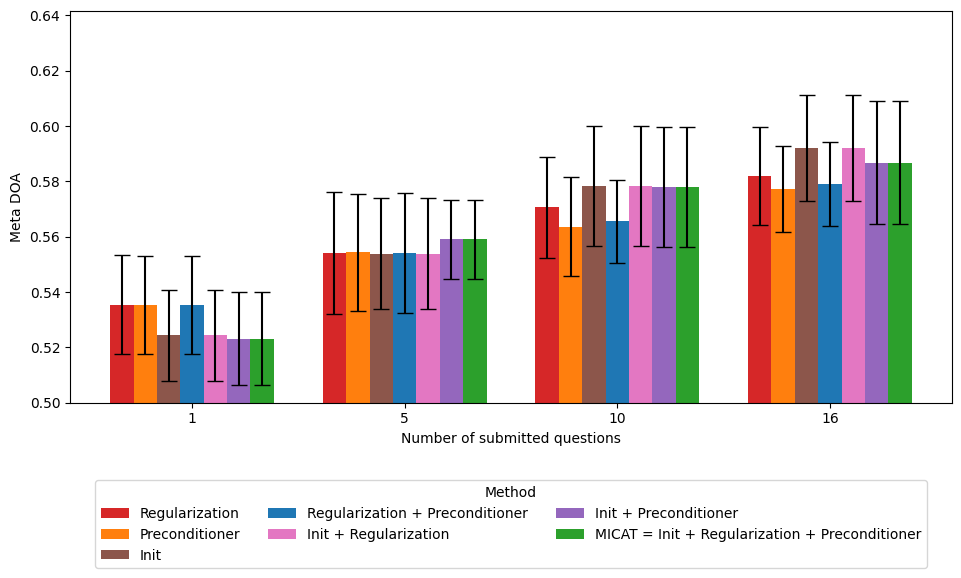

In [51]:
import numpy as np
r1 = {m : {step:[] for step in range(16)} for m in results.keys()}
std = {m : {step:0 for step in range(16)} for m in results.keys()}
mean = {m : {step:0 for step in range(16)} for m in results.keys()}
for method in results.keys():
    for i_fold, fold in enumerate(results[method]) : 
        for step, values in fold[1].items() :
            r1[method][int(step)].append(values['meta_doa'])
for method in results.keys():
    for step, values in fold[1].items() :
            std[method][int(step)] = (np.array(r1[method][int(step)])).std()
            mean[method][int(step)] = (np.array(r1[method][int(step)])).mean()
    

import numpy as np
import matplotlib.pyplot as plt

# Define the indices and methods
indices = [0, 4, 9, 15]
methods = ['MICAT_REG', 'MICAT_TERM','MICAT_INIT', 'MICAT_TERM_REG', 'MICAT_INIT_REG',  'MICAT_INIT_TERM','MICAT']

colors = {
    'MICAT_INIT': 'tab:brown',
    'MICAT_INIT_REG': 'tab:pink',
    'MICAT': 'tab:green',
    'MICAT_INIT_TERM': 'tab:purple',
    'MICAT_REG': 'tab:red',
    'MICAT_TERM': 'tab:orange',
    'MICAT_TERM_REG': 'tab:blue'
}
labels = {
    'MICAT_INIT': 'Init',
    'MICAT_INIT_REG': 'Init + Regularization',
    'MICAT': 'MICAT = Init + Regularization + Preconditioner',
    'MICAT_INIT_TERM': 'Init + Preconditioner',
    'MICAT_REG': 'Regularization',
    'MICAT_TERM': 'Preconditioner',
    'MICAT_TERM_REG': 'Regularization + Preconditioner'
}

# Assume mean_dict and std_dict are your dictionaries from above


# Extract means and stds for plotting
means = np.array([[mean[m][idx] for m in methods] for idx in indices])
stds = np.array([[std[m][idx] for m in methods] for idx in indices])

n_methods = len(methods)
n_groups = len(indices)
bar_width = 0.11
x = np.arange(n_groups)

fig, ax = plt.subplots(figsize=(10, 6))


for i, m in enumerate(methods):
    ax.bar(x + i * bar_width, means[:, i], width=bar_width, yerr=stds[:, i],
           capsize=6, label=labels[m], color=colors[m])

# X-axis ticks in the center of grouped bars
ax.set_xticks(x + bar_width * (n_methods - 1) / 2)
ax.set_xticklabels([idx+1 for idx in indices])
ax.set_xlabel('Number of submitted questions')
ax.set_ylabel('Meta DOA')
ax.set_ylim(0.5, None)  # The second argument 'None' lets matplotlib choose the upper limit automatically
#ax.set_title('Mean Accuracy with uncertainty (std) over the number of submitted questions.')
ax.legend(title='Method', loc='upper center',
    bbox_to_anchor=(0.5, -0.18),   # adjust -0.18 as needed to fit nicely
    ncol=3,)
plt.tight_layout()
plt.savefig('../../../figs/Meta_DOA_ablation.png', dpi=300, bbox_inches='tight')
plt.show()



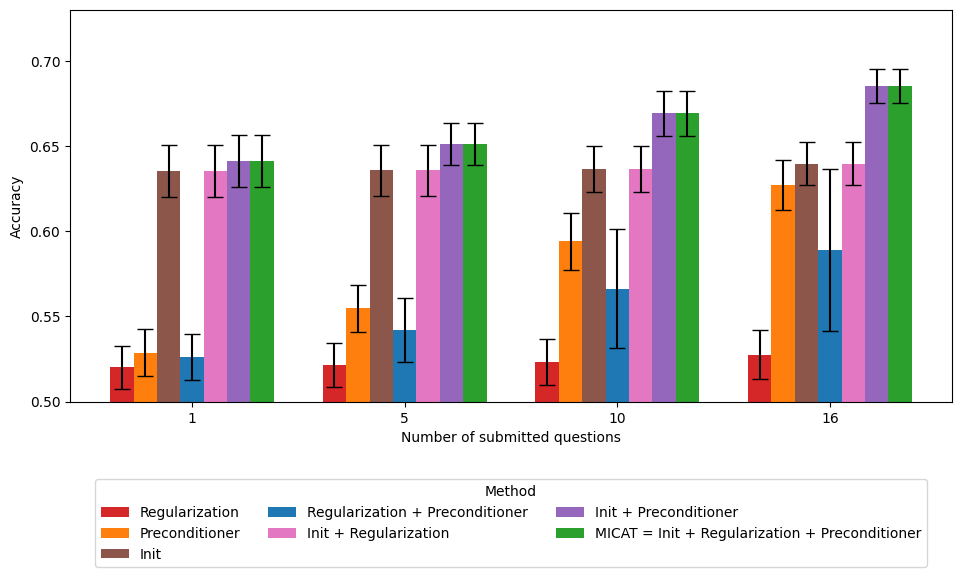

In [53]:
import numpy as np
r1 = {m : {step:[] for step in range(16)} for m in results.keys()}
std = {m : {step:0 for step in range(16)} for m in results.keys()}
mean = {m : {step:0 for step in range(16)} for m in results.keys()}
for method in results.keys():
    for i_fold, fold in enumerate(results[method]) : 
        for step, values in fold[0].items() :
            r1[method][int(step)].append(values['mi_acc'])
for method in results.keys():
    for step, values in fold[0].items() :
            std[method][int(step)] = (np.array(r1[method][int(step)])).std()
            mean[method][int(step)] = (np.array(r1[method][int(step)])).mean()
    

import numpy as np
import matplotlib.pyplot as plt

# Define the indices and methods
indices = [0, 4, 9, 15]
methods = ['MICAT_REG', 'MICAT_TERM','MICAT_INIT', 'MICAT_TERM_REG', 'MICAT_INIT_REG',  'MICAT_INIT_TERM','MICAT']

colors = {
    'MICAT_INIT': 'tab:brown',
    'MICAT_INIT_REG': 'tab:pink',
    'MICAT': 'tab:green',
    'MICAT_INIT_TERM': 'tab:purple',
    'MICAT_REG': 'tab:red',
    'MICAT_TERM': 'tab:orange',
    'MICAT_TERM_REG': 'tab:blue'
}
labels = {
    'MICAT_INIT': 'Init',
    'MICAT_INIT_REG': 'Init + Regularization',
    'MICAT': 'MICAT = Init + Regularization + Preconditioner',
    'MICAT_INIT_TERM': 'Init + Preconditioner',
    'MICAT_REG': 'Regularization',
    'MICAT_TERM': 'Preconditioner',
    'MICAT_TERM_REG': 'Regularization + Preconditioner'
}

# Assume mean_dict and std_dict are your dictionaries from above


# Extract means and stds for plotting
means = np.array([[mean[m][idx] for m in methods] for idx in indices])
stds = np.array([[std[m][idx] for m in methods] for idx in indices])

n_methods = len(methods)
n_groups = len(indices)
bar_width = 0.11
x = np.arange(n_groups)

fig, ax = plt.subplots(figsize=(10, 6))


for i, m in enumerate(methods):
    ax.bar(x + i * bar_width, means[:, i], width=bar_width, yerr=stds[:, i],
           capsize=6, label=labels[m], color=colors[m])

# X-axis ticks in the center of grouped bars
ax.set_xticks(x + bar_width * (n_methods - 1) / 2)
ax.set_xticklabels([idx+1 for idx in indices])
ax.set_xlabel('Number of submitted questions')
ax.set_ylabel('Accuracy')
ax.set_ylim(0.5, None)  # The second argument 'None' lets matplotlib choose the upper limit automatically
#ax.set_title('Mean Accuracy with uncertainty (std) over the number of submitted questions.')
ax.legend(title='Method', loc='upper center',
    bbox_to_anchor=(0.5, -0.18),   # adjust -0.18 as needed to fit nicely
    ncol=3,)
plt.tight_layout()
plt.savefig('../../../figs/Accuracy_ablation.png', dpi=300, bbox_inches='tight')
plt.show()



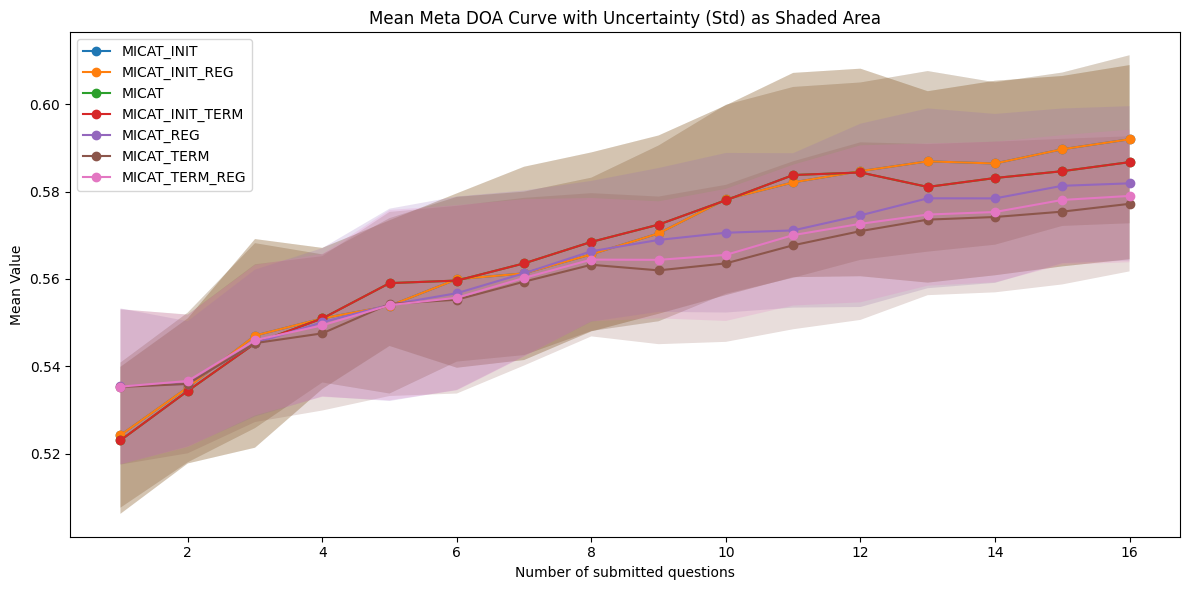

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# --- Example Data (replace with your real data) ---


methods = list(mean.keys())
indices = list(mean[methods[0]].keys())  # Assuming all methods have the same keys
indices = np.array([idx+1 for idx in indices])

plt.figure(figsize=(12, 6))

for method in methods:
    means = np.array([mean[method][i-1] for i in indices])
    stds = np.array([std[method][i-1] for i in indices])
    plt.plot(indices, means, marker='o', label=method)
    plt.fill_between(indices, means - stds, means + stds, alpha=0.2)

plt.xlabel('Number of submitted questions')
plt.ylabel('Mean Value')
plt.title('Mean Meta DOA Curve with Uncertainty (Std) as Shaded Area')
plt.legend()
plt.tight_layout()
plt.show()


In [5]:
len(std)

7

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Example data
categories = ['A', 'B', 'C', 'D']
means = np.array([2.5, 3.8, 1.9, 4.1])
stds = np.array([0.3, 0.7, 0.2, 0.5])  # Uncertainty (e.g., std deviation)

fig, ax = plt.subplots(figsize=(6,4))

bars = ax.bar(categories, means, yerr=stds, capsize=10, color='skyblue', edgecolor='black', linewidth=1.2)

# The error bars (moustache) are shown on top of each bar automatically via yerr and capsize.

# Optional: highlight the error bars ("moustaches") further
for bar, std in zip(bars, stds):
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    # Draw a horizontal line ("moustache") for each bar manually (optional, for custom appearance)
    ax.plot([x-0.15, x+0.15], [y+std, y+std], color='k', lw=2)
    ax.plot([x-0.15, x+0.15], [y-std, y-std], color='k', lw=2)

ax.set_ylabel('Value')
ax.set_title('Bar Plot with Uncertainty as Moustache Plot')
plt.tight_layout()
plt.show()


In [13]:
print(std)

{'MICAT_INIT': {0: np.float64(0.015311678450248684), 1: np.float64(0.015576789025920842), 2: np.float64(0.015385880968059398), 3: np.float64(0.015385880968059398), 4: np.float64(0.01495398426626826), 5: np.float64(0.014447691130185122), 6: np.float64(0.014166756134757501), 7: np.float64(0.01413022158120815), 8: np.float64(0.013919491153503964), 9: np.float64(0.013765917490149899), 10: np.float64(0.014344688140669363), 11: np.float64(0.014208522056182345), 12: np.float64(0.014023492916829298), 13: np.float64(0.013899481730962938), 14: np.float64(0.013429734904105307), 15: np.float64(0.012630633313053757)}, 'MICAT_INIT_REG': {0: np.float64(0.015311678450248684), 1: np.float64(0.015576789025920842), 2: np.float64(0.015385880968059398), 3: np.float64(0.015385880968059398), 4: np.float64(0.01495398426626826), 5: np.float64(0.014447691130185122), 6: np.float64(0.014166756134757501), 7: np.float64(0.01413022158120815), 8: np.float64(0.013919491153503964), 9: np.float64(0.013765917490149899), 

In [4]:
r2 = {m : {step:0 for step in range(16)} for m in results.keys()}
for method in results.keys():
    for i_fold, fold in enumerate(results[method]) : 
        for step, values in fold[0].items() :
            r2[method][int(step)] += (values['mi_acc']/results['MICAT'][i_fold][0][step]['mi_acc'])*100/5
    

In [5]:
r2

{'MICAT_INIT': {0: 99.02847874213727,
  1: 98.84867825206221,
  2: 98.39380254768244,
  3: 98.00012132891382,
  4: 97.60249170416606,
  5: 97.39125053835295,
  6: 96.96062956547573,
  7: 96.64777311696423,
  8: 96.06787518520221,
  9: 95.11942855436175,
  10: 95.11093716472195,
  11: 94.71310027009267,
  12: 94.0451955942788,
  13: 93.51124520596912,
  14: 93.41915007648996,
  15: 93.32953257486933},
 'MICAT_INIT_REG': {0: 99.02847874213727,
  1: 98.84867825206221,
  2: 98.39380254768244,
  3: 98.00012132891382,
  4: 97.60249170416606,
  5: 97.39125053835295,
  6: 96.96062956547573,
  7: 96.64777311696423,
  8: 96.06787518520221,
  9: 95.11942855436175,
  10: 95.11093716472195,
  11: 94.71310027009267,
  12: 94.0451955942788,
  13: 93.51124520596912,
  14: 93.41915007648996,
  15: 93.32953257486933},
 'MICAT': {0: 100.0,
  1: 100.0,
  2: 100.0,
  3: 100.0,
  4: 100.0,
  5: 100.0,
  6: 100.0,
  7: 100.0,
  8: 100.0,
  9: 100.0,
  10: 100.0,
  11: 100.0,
  12: 100.0,
  13: 100.0,
  14: 1